In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
%matplotlib inline

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-09-04 16:36:22.439000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [29]:
data = pd.read_csv("review_text.txt", header=None, sep="\n")

In [30]:
data.head(1)

,0
0,"22703, “Trip-hop” eventually became a ’90s pun..."


In [31]:
data['review_id'], data['review_text'] = data[0].str.split(',', 1).str
data.head()

,0,review_id,review_text
0,"22703, “Trip-hop” eventually became a ’90s pun...",22703,“Trip-hop” eventually became a ’90s punchline...
1,"22721, Eight years, five albums, and two EPs i...",22721,"Eight years, five albums, and two EPs in, the..."
2,"22659, Minneapolis’ Uranium Club seem to revel...",22659,Minneapolis’ Uranium Club seem to revel in be...
3,"22661, Kleenex began with a crash. It transpir...",22661,Kleenex began with a crash. It transpired one...
4,"22725, It is impossible to consider a given re...",22725,It is impossible to consider a given release ...


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation

In [32]:
documents = data['review_text']
review1 = documents.head(1)

In [9]:
no_features = 1000
no_topics = 20

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [10]:
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [11]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [12]:
no_top_words = 10

display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
like dance house tracks music track bass techno disco mix
Topic 1:
music jazz work album like sound group piece musicians musical
Topic 2:
blues new city country american york dylan jones war rock
Topic 3:
love ep oh song track like year heart debut night
Topic 4:
album songs song like voice folk lyrics guitar sings singer
Topic 5:
band rock like album guitar sound punk song songs metal
Topic 6:
soundtrack film movie theme music work story themes strings video
Topic 7:
smith blood moon fall men mark air dead red yeah
Topic 8:
live man king mountain stage audience life set performance crowd
Topic 9:
rap like fuck young shit just money big hot mixtape
Topic 10:
like noise guitar minutes album track minute music sounds drone
Topic 11:
band disc tracks songs version years albums time original set
Topic 12:
pop like indie rock album new songs band song sound
Topic 13:
hop hip album like beats rap track beat tracks production
Topic 14:
music like new label years world sound sounds a

In [19]:
lda_vectors = lda.transform(tf)

In [21]:
df = pd.DataFrame(lda_vectors)

In [33]:
df['review_id'] = data['review_id']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,review_id
0,0.036526,0.000146,0.000146,0.099911,0.087024,0.156783,0.004791,0.003279,0.039544,0.000146,...,0.115277,0.000146,0.266627,0.149488,0.000146,0.039434,0.000146,0.000146,0.000146,22703
1,0.000467,0.000467,0.000467,0.000467,0.000467,0.582395,0.000467,0.000467,0.000467,0.000467,...,0.077226,0.000467,0.104377,0.000467,0.000467,0.000467,0.000467,0.043489,0.000467,22721
2,0.181160,0.000368,0.000368,0.064099,0.000368,0.469345,0.000368,0.000368,0.063280,0.049007,...,0.000368,0.167962,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,0.000368,22659
3,0.000178,0.000178,0.000178,0.011961,0.068340,0.327870,0.005899,0.005727,0.000178,0.054200,...,0.042100,0.137351,0.009360,0.223134,0.000178,0.084211,0.006439,0.000178,0.000178,22661
4,0.273263,0.104213,0.000342,0.000342,0.102503,0.000342,0.000342,0.000342,0.041433,0.000342,...,0.000342,0.000342,0.473450,0.000342,0.000342,0.000342,0.000342,0.000342,0.000342,22725


In [34]:
df1 = pd.read_csv('merged_review_data.csv')
df1.head()

,Unnamed: 0,reviewid,title,artist,url,score,best_new_music,author,author_type,pub_date,pub_weekday,pub_day,pub_month,pub_year,year,genre,label
0,0,22703,mezzanine,massive attack,http://pitchfork.com/reviews/albums/22703-mezz...,9.3,0,nate patrin,contributor,2017-01-08,6,8,1,2017,1998.0,electronic,virgin
1,1,22721,prelapsarian,krallice,http://pitchfork.com/reviews/albums/22721-prel...,7.9,0,zoe camp,contributor,2017-01-07,5,7,1,2017,2016.0,metal,hathenter
2,2,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,rock,static shock
3,3,22659,all of them naturals,uranium club,http://pitchfork.com/reviews/albums/22659-all-...,7.3,0,david glickman,contributor,2017-01-07,5,7,1,2017,2016.0,rock,fashionable idiots
4,4,22661,first songs,"kleenex, liliput",http://pitchfork.com/reviews/albums/22661-firs...,9.0,1,jenn pelly,associate reviews editor,2017-01-06,4,6,1,2017,2016.0,rock,kill rock stars


In [35]:
from sklearn.manifold import TSNE

In [36]:
tsne_input = lda_vectors

In [39]:
import os
tsne_filepath = os.path.join(u'tsne_model')
tsne_vectors_filepath = os.path.join(u'tsne_vectors.npy')

In [43]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore


import warnings
import pickle as cpickle

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-09-04 15:49:22.243000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [50]:
tsne = TSNE()
tsne_vectors = tsne.fit_transform(tsne_input)
    


tsne_vectors = pd.DataFrame(tsne_vectors,
                            
                            columns=[u'x_coord', u'y_coord'])

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-09-04 16:24:06.755000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [51]:
tsne_vectors.head()

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-09-04 16:34:09.160000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,x_coord,y_coord
0,1.227663,3.545953
1,-2.233488,-4.749594
2,-3.379115,-0.684352
3,1.229295,-1.385552
4,1.010507,3.473737


In [53]:
tsne_vectors['review_id'] = data['review_id']
tsne_vectors['genre'] = df1['genre']
tsne_vectors.head()

C:\Users\Mike\Anaconda2\envs\py3DataScience\lib\site-packages\jupyter_client\jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-09-04 16:35:25.257000. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


,x_coord,y_coord,review_id,genre
0,1.227663,3.545953,22703,electronic
1,-2.233488,-4.749594,22721,metal
2,-3.379115,-0.684352,22659,rock
3,1.229295,-1.385552,22661,rock
4,1.010507,3.473737,22725,rock


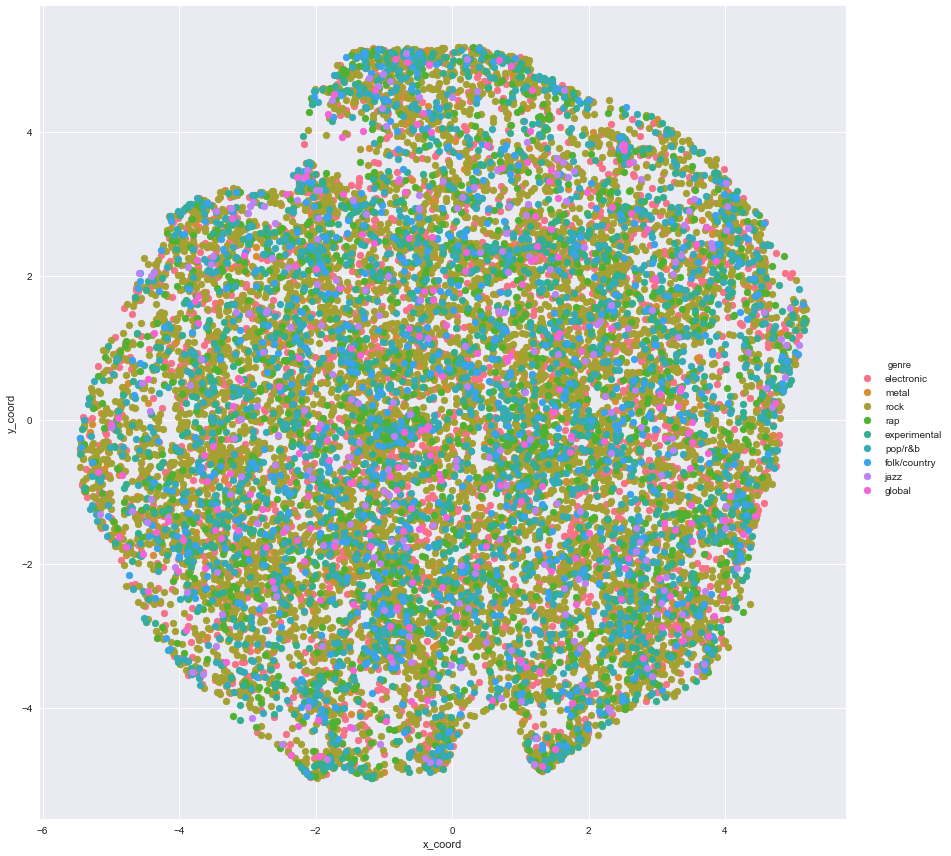

In [66]:
#fig, ax = plt.subplots(figsize=(12,10))
fg = sns.FacetGrid(data=tsne_vectors, hue='genre', size=12)
fg.map(plt.scatter, 'x_coord', 'y_coord').add_legend()